## Multi Instrument Plot
This tool downloads and visualizes time-series data of various instruments of a selected spacecraft including solar energetic particle intensities, solar wind plasma and magnetic field data. 

Selected remote-sensing observations such as radio spectrograms or X-ray light curves are also available.

#### Import tools and display options
GOES manual satellite selection: check to manually pick GOES satellite during data loading. When left unchecked, the highest numbered satellite is picked automatically.

Averaging options: "Averaging" averages particle data (except L1 which has its own options), "MAG averaging" averages magnetic field and plasma quantities, and "STIX/GOES averaging" averages STIX and GOES.


In [1]:
import os
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

from seppy.util import jupyterhub_data_path

import multi_inst_plots as m

In [2]:
m.options.show()

#### Data directory

Define where to download files. Running this cell will set it to \<current directory\>/data, or if run on the project's JupyterHub server, set it to a common data folder in the base directory. Setting to None will use sunpy's default data directory. 

In [3]:
m.options.path = f"{os.getcwd()}{os.sep}data"
m.options.path = jupyterhub_data_path(m.options.path)

#### Load data
Run this cell whenever spacecraft, instruments or dates are re-selected. Non-averaged data and metadata are returned should you want to use them for other purposes.

In [8]:
data, metadata = m.load_data()

Loading L1 (Wind/SOHO) data for range: 2022-03-14 00:00:00 - 2022-03-16 23:59:59


#### Energy channel selection
Print out energy ranges for each channel and choose the indices of the channels you want to include in your plot. If you want an evenly spaced range, you can use the cell below this one, but update only the `step` argument. You should see the values update in the boxes displayed by `m.energy_channel_selection()`. 

Range selection with widgets: click+drag cursor or Shift+click. Individual channels: Ctrl/Cmd + click.

In [9]:
# Display energy channel ranges and corresponding selection widgets
m.energy_channel_selection()

,3DP Electrons,3DP Protons,EPHIN Electrons,ERNE Protons
0,28.1 - 52.18 keV,137.62 - 255.58 keV,0.25 - 0.7 MeV,13 - 16 MeV
1,46.32 - 86.02 keV,233.39 - 433.44 keV,deactivated bc. of failure mode D,16 - 20 MeV
2,75.91 - 140.97 keV,386.66 - 718.09 keV,0.67 - 10.4 MeV,20 - 25 MeV
3,127.25 - 236.32 keV,712.59 - 1323.38 keV,4.80 - 10.4 MeV,25 - 32 MeV
4,216.66 - 402.36 keV,1451.67 - 2695.97 keV,NaN,32 - 40 MeV
5,361.78 - 671.87 keV,3107.7 - 5771.44 keV,NaN,40 - 50 MeV
6,<NA>,4728.47 - 8781.44 keV,NaN,50 - 64 MeV
7,<NA>,<NA>,NaN,64 - 80 MeV
8,<NA>,<NA>,NaN,80 - 100 MeV
9,<NA>,<NA>,NaN,100 - 130 MeV


In [ ]:
# Evenly spaced range selection
m.range_selection(low_e_step=2, low_p_stop=8, low_e_start=0, high_e_start=1, high_e_stop=7)

#### Define plot range

You can optionally define a smaller plotting range here. Values have to be valid datetime objects and within loaded time range. Set to None for 00:00 - 00:00.

In [ ]:
m.options.plot_start = None # dt.datetime(2022, 3, 15, 0, 0)
m.options.plot_end =  None # dt.datetime(2022, 3, 17, 0, 0)

#### Plot data
Figure and axes are returned for further tweaking capability.

Plotting L1 (Wind/SOHO) data for timerange 2022-03-14 00:00:00 - 2022-03-16 23:59:59


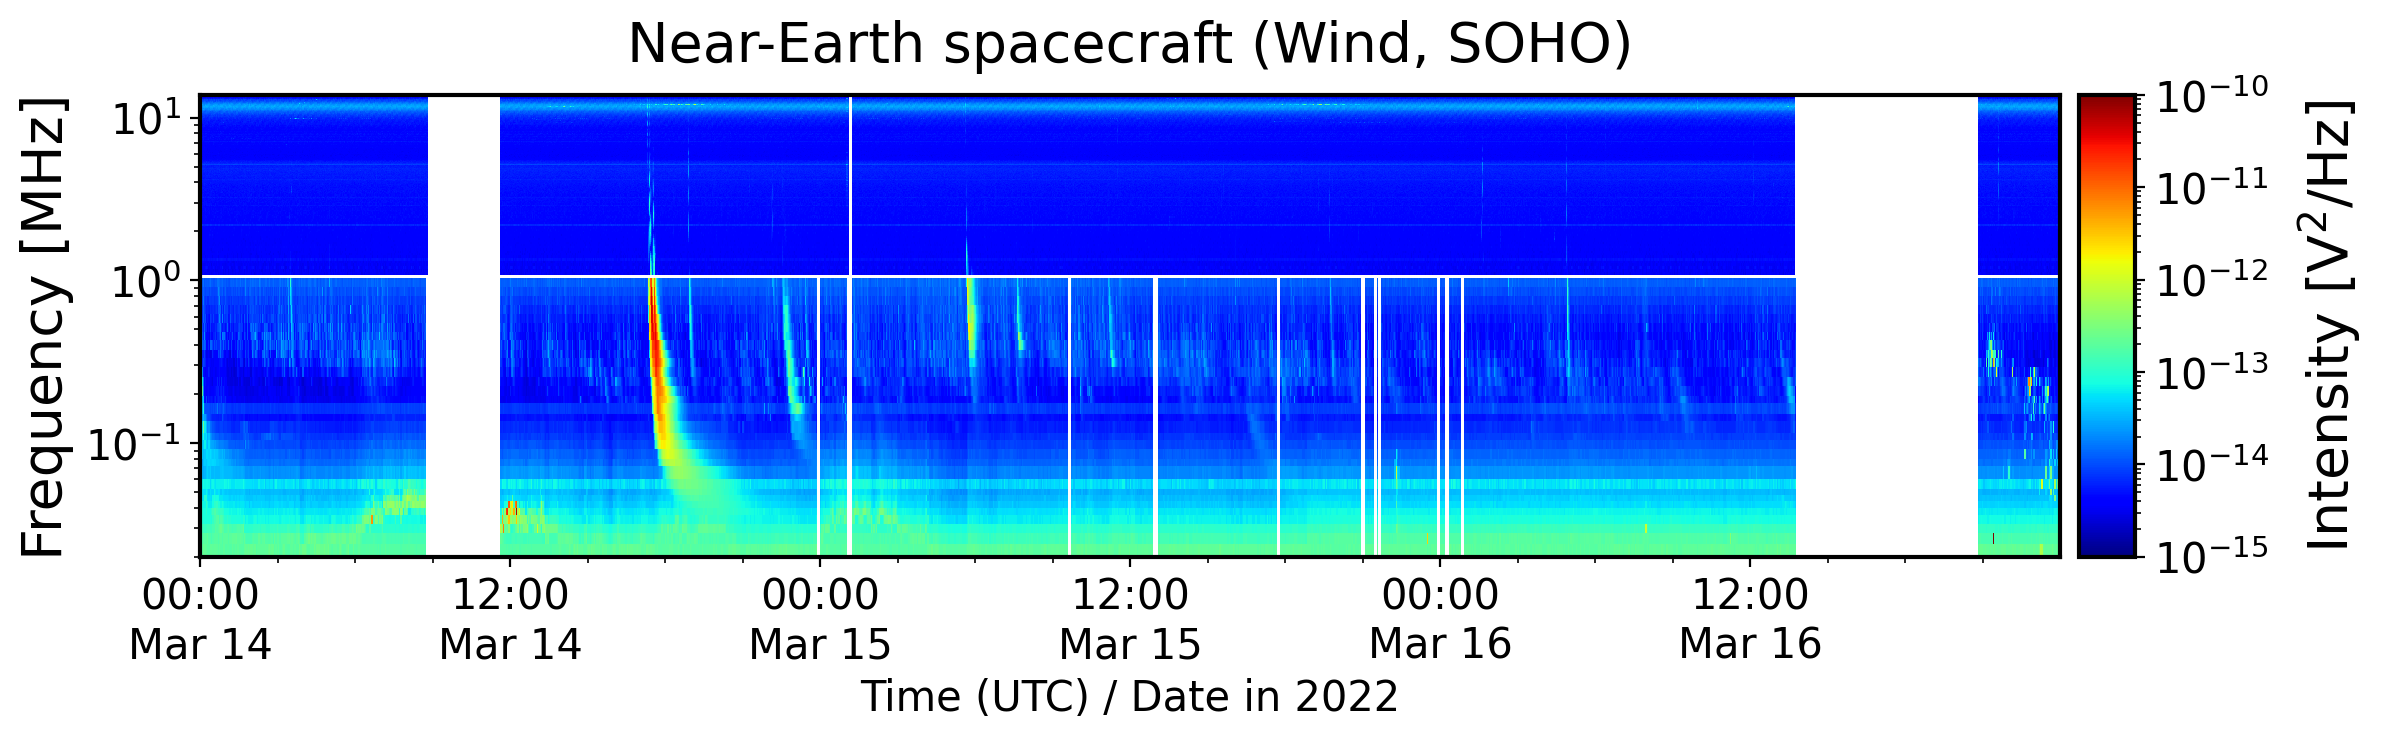

In [10]:
fig, axs = m.make_plot()

In [ ]:
for ax in axs:
    ax.axvline(dt.datetime(2022, 3, 14, 9), ls="--", c="k")

axs[-2].axvspan(dt.datetime(2022, 3, 15, 0, 0), dt.datetime(2022, 3, 15, 6, 0), alpha=0.5, ec="r", fc="r", ls="--")

fig

### Saving figures

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar). Alternatively, run the following cell.

In [ ]:
fig.savefig("SEP_multi-instrument_plot.png", bbox_inches="tight")